In [1]:
import numpy as np
import matplotlib
%matplotlib inline
import matplotlib.pyplot as plt

# Uncertain equation
$$u''(\omega; t)-(a(\omega)+b(\omega))u'(\omega;t) + a(\omega)b(\omega)u(t)=0$$
$$u(\omega; 0) = X(\omega)$$
$$u'(\omega; 0) = Y(\omega)$$

$X, Y,a, b\sim \mathcal{U}[0,1]$

In [2]:
@np.vectorize
def u_approx(u_0, dudt0, dt, T, a, b):
    """Approximates the solution of u''(t)-(a+b)*u'(t)+a*b*u(t)=0
    given u(0)=u_0 and u'(0)= dudx0"""
    
    u = u_0
    dudt = dudt0
    
    
    t=0
    while t < T:
        u += dt * dudt
        
        dudt +=  dt*(a+b)*dudt - dt*a*b*u
        
        t += dt
        
    return u

# Test that the method is correctly implemented

The solution to the ODE for a single configuration (this is just sanity checking of the code)

The general solution is
$$u(t) = A\exp(at) + B\exp(bt)$$

assuming furthermore $a=1$, $b=2$, $X=1$, $Y=0$, we get
$$u(t) = 2 \exp(t) - \exp(2t)$$

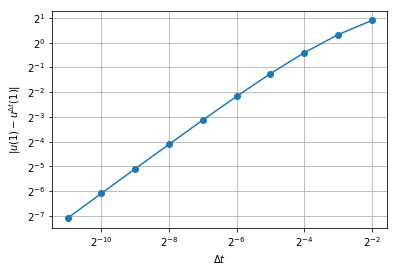

In [3]:
dts = 2.0**(-np.arange(2,12))
errors = []

for dt in dts:
    
    u = u_approx(1, 0, dt, 1, 1, 2)
    
    exact_solution = 2*np.exp(1)-np.exp(2)
    errors.append(abs(u - exact_solution))
    
plt.loglog(dts, errors, '-o', basex=2, basey=2)
plt.xlabel('$\Delta t$')
plt.ylabel('$|u(1)-u^{\Delta t}(1)|$')
plt.grid(True)

In [1]:
def approximate_mean_monte_carlo(M, T, dt):
    dt = 1.0/M
    
    # Implement Monte Carlo here to compute mean and variance
    
    return mean, var

Ms = 2**np.arange(2,9)

reference, var = approximate_mean_monte_carlo(Ms[-1]*16, 1, 1/(Ms[-1]*16))

errors = []
for M in Ms:
    dt = 1.0/np.sqrt(M)
    mean, var = approximate_mean_monte_carlo(M, 1, dt)
    
    errors.append(abs(reference-mean))
    
plt.loglog(Ms, errors, '-o', basex=2, basey=2)
plt.xlabel('$M$')
plt.ylabel('Error')
plt.show()
    
print(mean)
print(np.sqrt(var))

NameError: name 'np' is not defined